# <span style="color: #2E86C1;">Project Overview: 1.2.6.  Drug Bioactivity Prediction - Starter Kit</span>

## <span style="color: #5D6D7E;">1. Introduction</span>
This project involves analyzing a bioactivity dataset to understand the relationships between various chemical compounds and their biological activities. The goal is to predict the bioactivity of compounds based on their chemical structure and properties.

## <span style="color: #5D6D7E;">2. Objectives</span>
- To explore the dataset and identify key patterns and relationships.
- To preprocess the data for modeling.
- To develop a predictive model using machine learning techniques.
- To evaluate the performance of the model and fine-tune parameters for optimal results.

## <span style="color: #5D6D7E;">3. Dataset Description</span>
The dataset consists of 100 entries with the following columns:
- **assay_chembl_id**: Unique identifier for the assay.
- **molecule_chembl_id**: Unique identifier for the molecule.
- **standard_value**: The measured biological activity.
- **type**: Type of bioactivity (e.g., IC50).
- **value**: Numerical value of the bioactivity.

## <span style="color: #5D6D7E;">4. Methodology</span>

### <span style="color: #3498DB;">4.1 Data Exploration</span>
- Visualize distributions of numerical features.
- Examine correlations among different variables.
- Analyze categorical variables through count plots.

### <span style="color: #3498DB;">4.2 Data Preprocessing</span>
- Handle missing values by filling them with appropriate statistics.
- Encode categorical variables using label encoding.
- Apply log transformations to reduce skewness in data distributions.

### <span style="color: #3498DB;">4.3 Model Development</span>
- Split the dataset into training and testing sets.
- Utilize a Random Forest Regressor for predictions.
- Conduct hyperparameter tuning using GridSearchCV for optimal model configuration.

### <span style="color: #3498DB;">4.4 Model Evaluation</span>
- Assess model performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared values.
- Analyze cross-validated R-squared scores to ensure robustness of the model.

## <span style="color: #5D6D7E;">5. Conclusion</span>
The analysis aims to yield valuable insights into the bioactivity of compounds, contributing to the field of cheminformatics and drug discovery. The outcomes will assist researchers in identifying promising candidates for further investigation.

## <span style="color: #5D6D7E;">6. Future Work</span>
- Explore advanced modeling techniques such as neural networks.
- Expand the dataset with additional features or larger samples for better accuracy.
- Implement real-time bioactivity prediction systems for practical applications.

---

This project overview provides a comprehensive understanding of the objectives, methodology, and expected outcomes. It serves as a foundation for the detailed implementation and analysis performed in the associated code.

In [27]:
!pip install chembl_webresource_client  # Install the ChEMBL web resource client to access and interact with ChEMBL's chemical and biological data.


# <span style="color: #2E86C1;">Step 1: Importing Libraries</span>

In this step, we import the necessary libraries to facilitate data manipulation, analysis, and modeling. The primary libraries include:
- **Pandas**: For data manipulation and analysis.
- **NumPy**: For numerical operations.
- **Scikit-learn**: For machine learning algorithms and utilities.
- **Matplotlib** and **Seaborn**: For data visualization.
- **Warnings**: To suppress any warnings that may arise during the execution.

In [28]:
# Load the necessary libraries


In [29]:
import pandas as pd  # For data manipulation and analysis

In [30]:
import numpy as np  # For numerical operations

In [31]:
import matplotlib.pyplot as plt  # For plotting graphs

In [32]:
import seaborn as sns  # For statistical data visualization

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV  # For splitting the dataset and hyperparameter tuning


In [34]:
from sklearn.ensemble import RandomForestRegressor  # For regression modeling

In [35]:
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For feature scaling and encoding

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For model evaluation metrics

In [125]:
import warnings  # Import warnings to manage warnings

In [126]:
warnings.filterwarnings('ignore')  # Ignore warnings for cleaner output

# <span style="color: #2E86C1;">Step 2: Loading the Dataset</span>

Here, we load the bioactivity dataset from a specified file path. This dataset will be used for analysis and modeling. We can utilize **pandas** to read the dataset and inspect its initial structure to ensure it loaded correctly.

In [38]:
# Load the dataset

In [39]:
df = pd.read_csv('bioactivity_data.csv')  # Read the dataset from a CSV file

# <span style="color: #2E86C1;">Step 3: Exploring the Dataset</span>

In this step, we perform an exploratory analysis of the dataset. This includes:
- Viewing the first few rows to understand its structure.
- Checking for missing values and non-null counts in each column.
- Generating summary statistics to gather insights into the data distribution.

In [40]:
# Display the first few rows of the dataset

In [41]:
print("First 5 rows of the dataset:")  # Print a message
print(df.head())  # Display the first 5 rows of the DataFrame

First 5 rows of the dataset:
  assay_chembl_id molecule_chembl_id  standard_value  type  value
0    CHEMBL674637        CHEMBL68920            41.0  IC50  0.041
1    CHEMBL621151        CHEMBL68920           300.0  IC50  0.300
2    CHEMBL615325        CHEMBL68920          7820.0  IC50  7.820
3    CHEMBL674637        CHEMBL69960           170.0  IC50  0.170
4    CHEMBL621151        CHEMBL69960            40.0  IC50  0.040


In [42]:
# Display information about the dataset (column names, non-null counts, and data types)

In [43]:
print("\nDataset Information:")  # Print a message
print(df.info())  # Display information about the DataFrame


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   assay_chembl_id     100 non-null    object 
 1   molecule_chembl_id  100 non-null    object 
 2   standard_value      87 non-null     float64
 3   type                100 non-null    object 
 4   value               87 non-null     float64
dtypes: float64(2), object(3)
memory usage: 4.0+ KB
None


In [44]:
# Summary statistics of the dataset

In [45]:
print("\nSummary statistics:")  # Print a message
print(df.describe())  # Display summary statistics for numerical columns


Summary statistics:
       standard_value        value
count    8.700000e+01    87.000000
mean     4.224033e+05   422.403258
std      8.619040e+05   861.904027
min      4.500000e-01     0.000450
25%      1.730000e+03     1.730000
50%      6.000000e+04    60.000000
75%      4.750000e+05   475.000000
max      6.500000e+06  6500.000000


In [105]:
# Display unique values in categorical columns

In [106]:
unique_assay_ids = df['assay_chembl_id'].unique()  # Get unique assay IDs

In [107]:
unique_molecule_ids = df['molecule_chembl_id'].unique()  # Get unique molecule IDs

In [108]:
unique_types = df['type'].unique()  # Get unique types

In [109]:
print("Unique assay_chembl_id:", unique_assay_ids)  # Print unique assay IDs

Unique assay_chembl_id: ['CHEMBL674637' 'CHEMBL621151' 'CHEMBL615325' 'CHEMBL677833'
 'CHEMBL674643' 'CHEMBL675639' 'CHEMBL675636' 'CHEMBL675637'
 'CHEMBL676063' 'CHEMBL675640' 'CHEMBL674645' 'CHEMBL675638'
 'CHEMBL674646' 'CHEMBL676065' 'CHEMBL615490' 'CHEMBL679675'
 'CHEMBL675641']


In [110]:
print("Unique molecule_chembl_id:", unique_molecule_ids)  # Print unique molecule IDs

Unique molecule_chembl_id: ['CHEMBL68920' 'CHEMBL69960' 'CHEMBL137635' 'CHEMBL306988' 'CHEMBL66879'
 'CHEMBL77085' 'CHEMBL443268' 'CHEMBL76979' 'CHEMBL76589' 'CHEMBL77724'
 'CHEMBL420385' 'CHEMBL76904' 'CHEMBL1009' 'CHEMBL304271' 'CHEMBL296407'
 'CHEMBL309625' 'CHEMBL77825' 'CHEMBL421877' 'CHEMBL77278' 'CHEMBL310798'
 'CHEMBL135592' 'CHEMBL309866' 'CHEMBL77381' 'CHEMBL76602' 'CHEMBL77737'
 'CHEMBL76983' 'CHEMBL308134' 'CHEMBL136491' 'CHEMBL77280' 'CHEMBL42423'
 'CHEMBL76557' 'CHEMBL336113' 'CHEMBL133024' 'CHEMBL344652' 'CHEMBL77814'
 'CHEMBL47986' 'CHEMBL441343' 'CHEMBL138125' 'CHEMBL137364' 'CHEMBL308339'
 'CHEMBL78174' 'CHEMBL302552' 'CHEMBL309598' 'CHEMBL78302' 'CHEMBL67057'
 'CHEMBL332096' 'CHEMBL77387' 'CHEMBL432903' 'CHEMBL69964' 'CHEMBL65848'
 'CHEMBL69129' 'CHEMBL78184' 'CHEMBL76985' 'CHEMBL145' 'CHEMBL69629'
 'CHEMBL136492' 'CHEMBL77197' 'CHEMBL305695' 'CHEMBL68258' 'CHEMBL76587']


In [111]:
print("Unique types:", unique_types)  # Print unique types

Unique types: ['IC50' 'Ki']


In [113]:
# Check for duplicates

In [114]:
duplicates = df.duplicated().sum()  # Count number of duplicate rows

In [115]:
print(f"Number of duplicate rows: {duplicates}")  # Print the number of duplicates

Number of duplicate rows: 0


# <span style="color:blue;">📊 Exploratory Data Analysis (EDA) Notes</span>

## <span style="color:green;"> Displaying Unique Values and Duplicates</span>
- **Purpose**: Assess the uniqueness and cleanliness of the dataset.
- **Methods**:
  - Use `.unique()` to find unique values for categorical variables like `assay_chembl_id`, `molecule_chembl_id`, and `type`.
  - Count duplicates using `.duplicated().sum()` to determine data quality.

---

## <span style="color:green;"> Summary Statistics</span>
- **Purpose**: Obtain a quick overview of the numerical features in the dataset.
- **Methods**: Utilize `.describe()` to generate summary statistics, including count, mean, standard deviation, min, max, and quartiles for `standard_value` and `value`.

---

## <span style="color:green;"> Pie Chart for Distribution of Types</span>
- **Purpose**: Visually represent the distribution of different types in the dataset.
- **Methods**:
  - Calculate the value counts of the `type` column using `.value_counts()`.
  - Create a pie chart with `plt.pie()` to display proportions of each type, including percentage labels for clarity.

---

## <span style="color:green;"> Line Plot of Standard Value</span>
- **Purpose**: Identify trends or patterns in the `standard_value` across the dataset.
- **Methods**:
  - Plot the `standard_value` against the index using `plt.plot()`, adding markers to highlight individual data points.

---

## <span style="color:green;"> Violin Plot of Value Distribution by Type</span>
- **Purpose**: Show the distribution of `value` across different `type` categories, highlighting data spread and potential outliers.
- **Methods**: Use `sns.violinplot()` to visualize the `value` distribution segmented by `type`, allowing for comparison across categories.

---

## <span style="color:green;"> Correlation Matrix</span>
- **Purpose**: Assess the relationships between numerical features in the dataset.
- **Methods**:
  - Compute the correlation matrix using `.corr()`.
  - Visualize the correlation matrix with a heatmap using `sns.heatmap()`, providing insights into linear relationships between variables.

---

## <span style="color:green;"> Box Plot for Standard Value by Type</span>
- **Purpose**: Identify outliers and understand the distribution of `standard_value` across different `type` categories.
- **Methods**: Use `sns.boxplot()` to create a box plot, displaying the median, quartiles, and outliers for `standard_value` segmented by `type`.

---

## <span style="color:green;"> Distribution Plots</span>
- **Purpose**: Visualize the distribution of numerical features, identifying skewness and potential outliers.
- **Methods**: Employ `sns.histplot()` or `sns.kdeplot()` for the `standard_value` and `value` columns, allowing for assessment of normality and spread.

---

In [46]:
#  Exploratory Data Analysis (EDA)

In [124]:
# Create a box plot for 'standard_value' segmented by 'type'

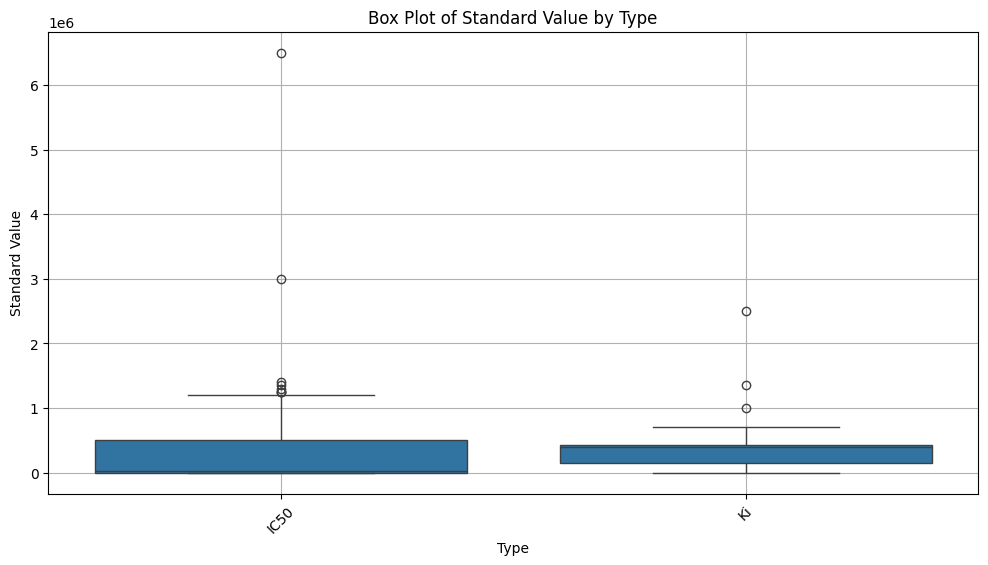

In [122]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.boxplot(x='type', y='standard_value', data=df)  # Draw box plot
plt.title('Box Plot of Standard Value by Type')  # Set the title
plt.xlabel('Type')  # Set x-axis label
plt.ylabel('Standard Value')  # Set y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)  # Add a grid for easier interpretation
plt.show()  # Display the plot

In [47]:
## Distribution of 'standard_value'

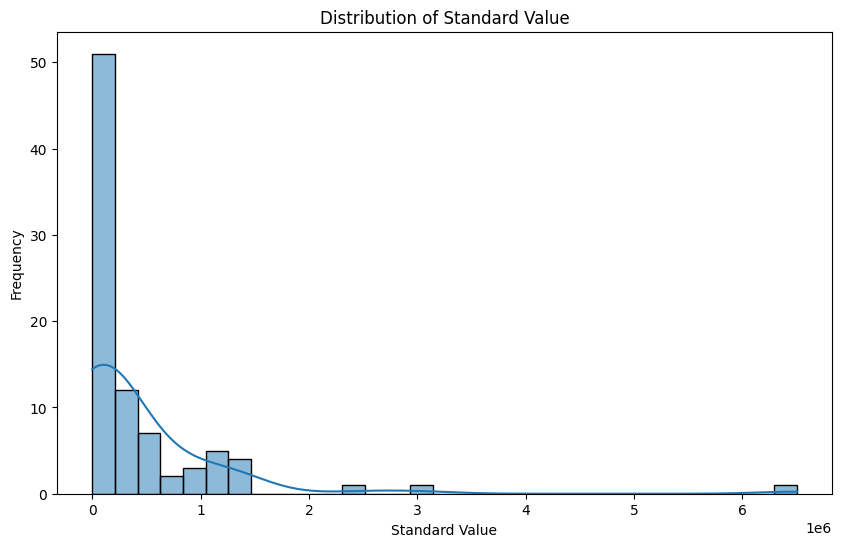

In [48]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['standard_value'], kde=True)  # Plot histogram with KDE for 'standard_value'
plt.title('Distribution of Standard Value')  # Set the title of the plot
plt.xlabel('Standard Value')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.show()  # Display the plot

In [49]:
##  Distribution of 'value'

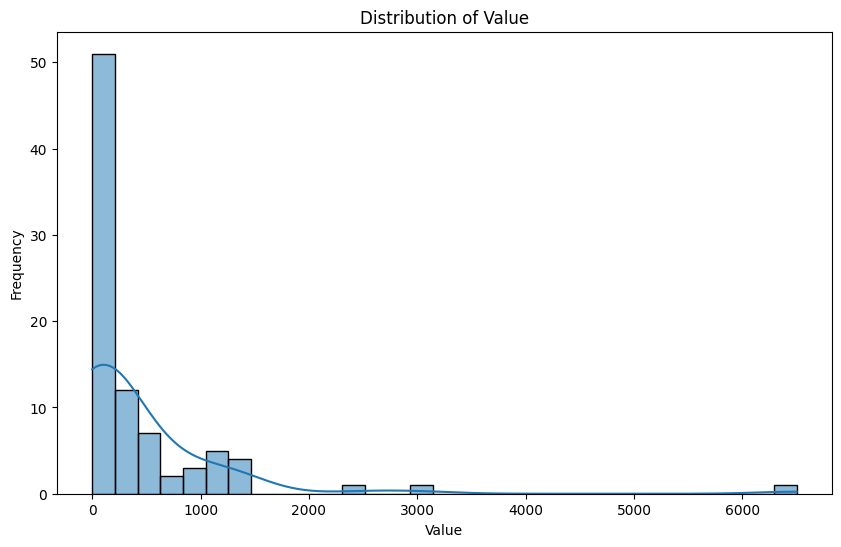

In [50]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(df['value'], kde=True)  # Plot histogram with KDE for 'value'
plt.title('Distribution of Value')  # Set the title of the plot
plt.xlabel('Value')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.show()  # Display the plot

In [51]:
##  Countplot of Categorical Variables

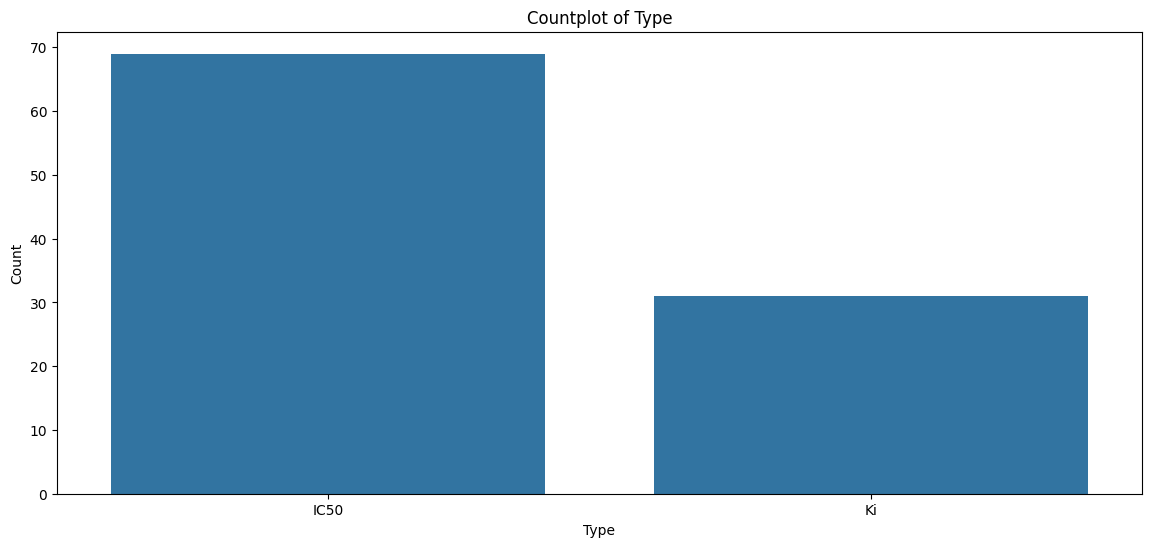

In [52]:
plt.figure(figsize=(14, 6))  # Set the figure size
sns.countplot(data=df, x='type')  # Create a countplot for 'type'
plt.title('Countplot of Type')  # Set the title of the plot
plt.xlabel('Type')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.show()  # Display the plot

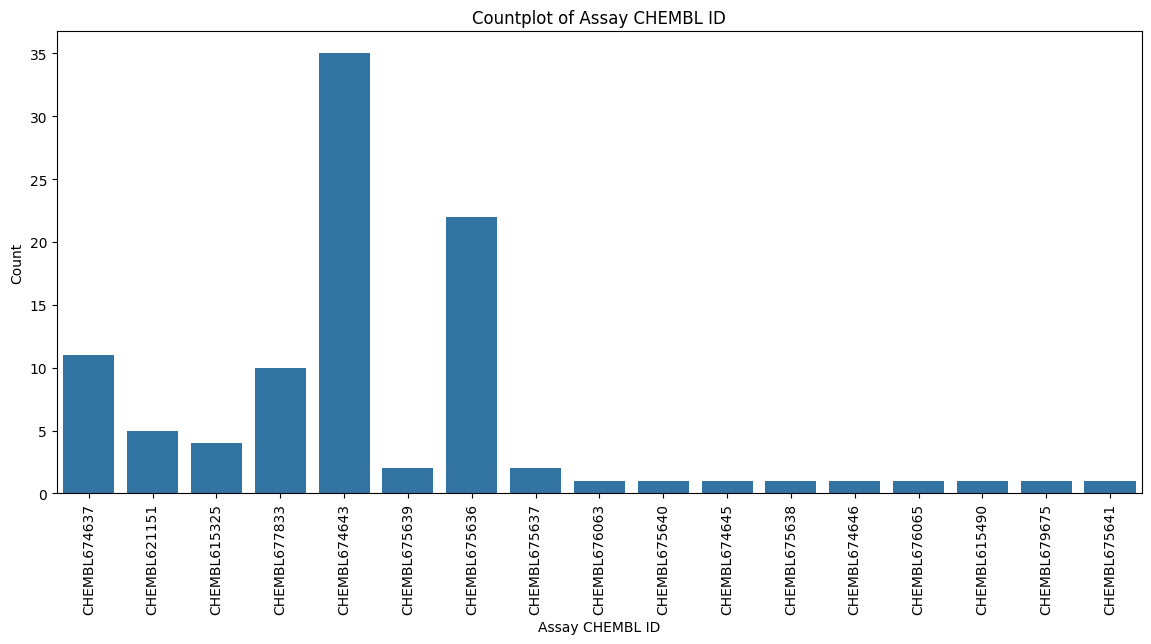

In [53]:
plt.figure(figsize=(14, 6))  # Set the figure size
sns.countplot(data=df, x='assay_chembl_id')  # Create a countplot for 'assay_chembl_id'
plt.title('Countplot of Assay CHEMBL ID')  # Set the title of the plot
plt.xlabel('Assay CHEMBL ID')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

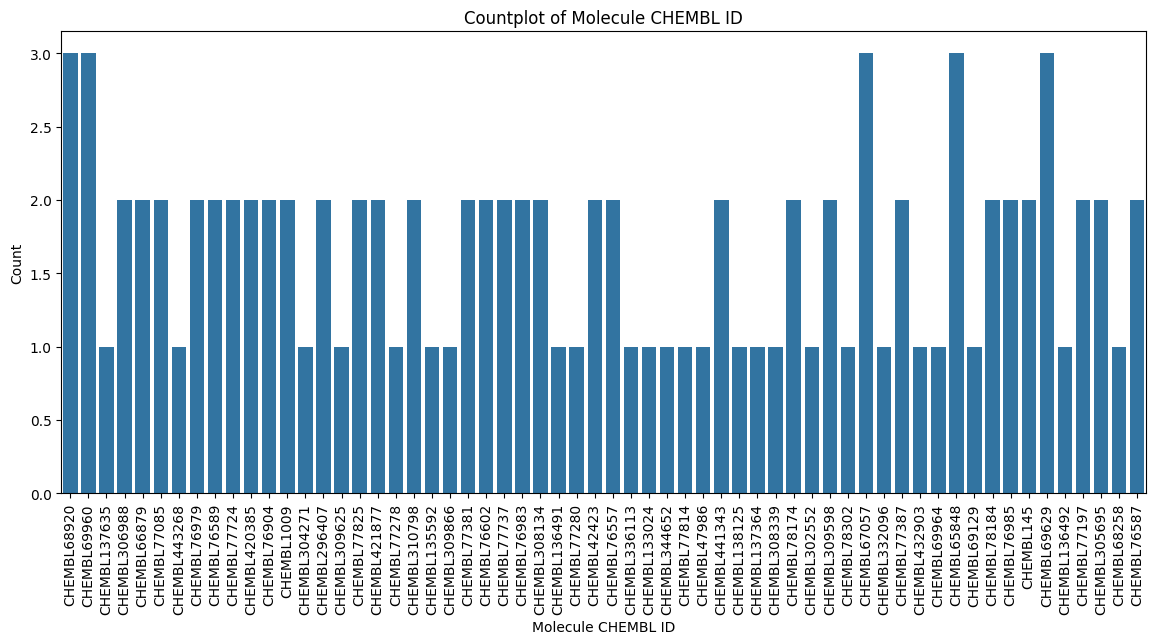

In [54]:
plt.figure(figsize=(14, 6))  # Set the figure size
sns.countplot(data=df, x='molecule_chembl_id')  # Create a countplot for 'molecule_chembl_id'
plt.title('Countplot of Molecule CHEMBL ID')  # Set the title of the plot
plt.xlabel('Molecule CHEMBL ID')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

In [55]:
## Correlation Heatmap

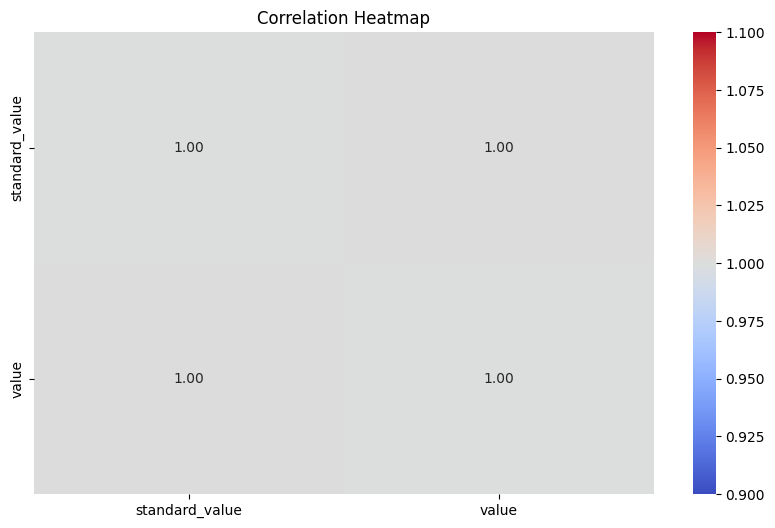

In [57]:
plt.figure(figsize=(10, 6))  # Set the figure size
numeric_cols = df.select_dtypes(include=[np.number])  # Select only numeric columns for correlation
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')  # Plot heatmap of the correlation matrix
plt.title('Correlation Heatmap')  # Set the title of the plot
plt.show()  # Show the plot

In [116]:
# Pie chart for the distribution of types

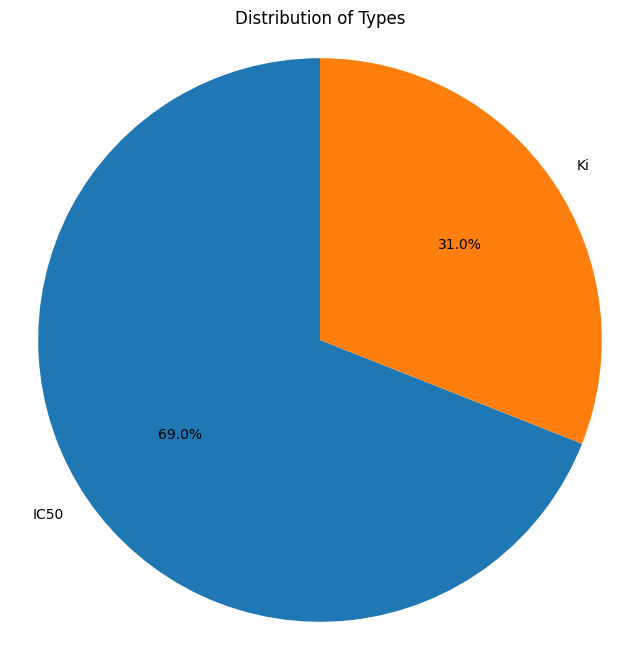

In [117]:
type_counts = df['type'].value_counts()  # Count occurrences of each type
plt.figure(figsize=(8, 8))  # Set figure size for the pie chart
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)  # Create pie chart with labels and percentage
plt.title('Distribution of Types')  # Set title for the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()  # Display the pie chart

In [118]:
# Line plot of standard_value over index

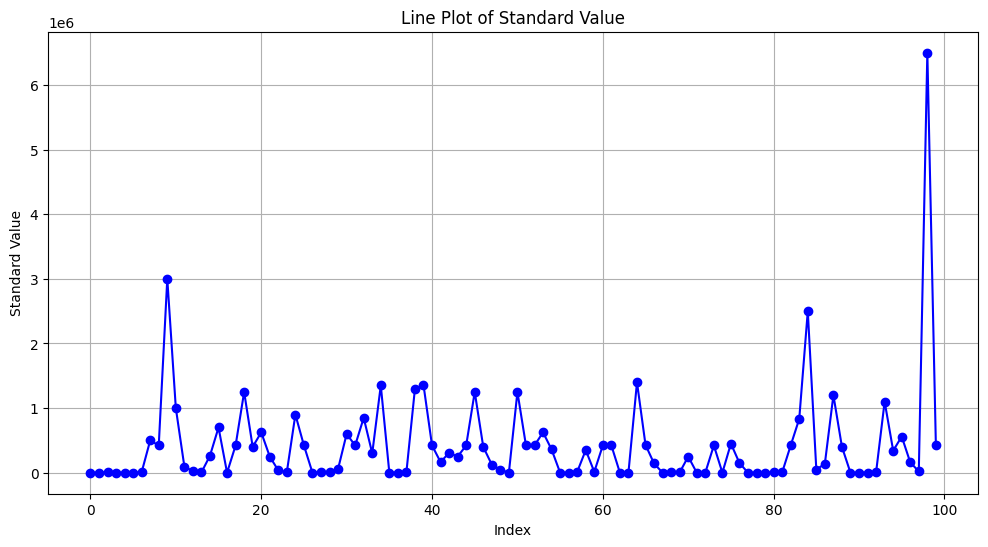

In [119]:
plt.figure(figsize=(12, 6))  # Set figure size for the line plot
plt.plot(df.index, df['standard_value'], marker='o', linestyle='-', color='blue')  # Create line plot with markers
plt.title('Line Plot of Standard Value')  # Set title for the line plot
plt.xlabel('Index')  # Set x-axis label
plt.ylabel('Standard Value')  # Set y-axis label
plt.grid()  # Enable grid on the plot
plt.show()  # Display the line plot

In [120]:
# Violin plot of value distribution by type

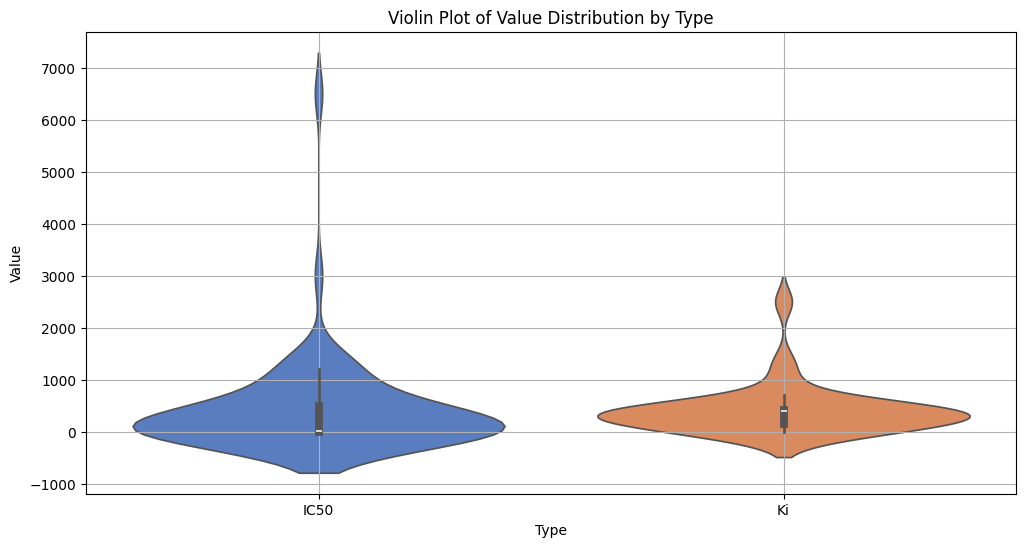

In [127]:
plt.figure(figsize=(12, 6))  # Set figure size for the violin plot
sns.violinplot(x='type', y='value', data=df, palette='muted')  # Create violin plot for value distribution by type
plt.title('Violin Plot of Value Distribution by Type')  # Set title for the violin plot
plt.xlabel('Type')  # Set x-axis label
plt.ylabel('Value')  # Set y-axis label
plt.grid()  # Enable grid on the plot
plt.show()  # Display the violin plot

# <span style="color: #2E86C1;">Step 4: Data Preprocessing</span>

Data preprocessing is essential to prepare the dataset for modeling. This step involves:
- Handling missing values: We can fill or drop missing entries as needed.
- Encoding categorical variables: Convert categorical data into numerical format using techniques like label encoding.
- Log transformations: Apply log transformations to skewed numerical features to improve normality.

In [58]:
#  Data Preprocessing

In [59]:
## Fill missing values

In [60]:
df['standard_value'].fillna(df['standard_value'].mean(), inplace=True)  # Fill NaN values in 'standard_value' with the mean


In [61]:
df['value'].fillna(df['value'].mean(), inplace=True)  # Fill NaN values in 'value' with the mean

In [62]:
## Encode categorical features

In [63]:
le_assay = LabelEncoder()  # Initialize label encoder for 'assay_chembl_id'

In [64]:
df['assay_chembl_id_encoded'] = le_assay.fit_transform(df['assay_chembl_id'])  # Encode 'assay_chembl_id'

In [65]:
le_molecule = LabelEncoder()  # Initialize label encoder for 'molecule_chembl_id'

In [66]:
df['molecule_chembl_id_encoded'] = le_molecule.fit_transform(df['molecule_chembl_id'])  # Encode 'molecule_chembl_id'


In [67]:
le_type = LabelEncoder()  # Initialize label encoder for 'type'

In [68]:
df['type_encoded'] = le_type.fit_transform(df['type'])  # Encode 'type'

In [69]:
## Feature Engineering: Log transformation to reduce skewness

In [70]:
df['standard_value_log'] = np.log1p(df['standard_value'])  # Log transform 'standard_value'

In [71]:
df['value_log'] = np.log1p(df['value'])  # Log transform 'value'

In [72]:
# Display dataset after preprocessing

In [73]:
print("\nDataset after preprocessing:")  # Print a message
print(df.head())  # Display the first 5 rows of the preprocessed DataFrame


Dataset after preprocessing:
  assay_chembl_id molecule_chembl_id  standard_value  type  value  \
0    CHEMBL674637        CHEMBL68920            41.0  IC50  0.041   
1    CHEMBL621151        CHEMBL68920           300.0  IC50  0.300   
2    CHEMBL615325        CHEMBL68920          7820.0  IC50  7.820   
3    CHEMBL674637        CHEMBL69960           170.0  IC50  0.170   
4    CHEMBL621151        CHEMBL69960            40.0  IC50  0.040   

   assay_chembl_id_encoded  molecule_chembl_id_encoded  type_encoded  \
0                        3                          34             0   
1                        2                          34             0   
2                        0                          34             0   
3                        3                          37             0   
4                        2                          37             0   

   standard_value_log  value_log  
0            3.737670   0.040182  
1            5.707110   0.262364  
2            8.96

In [74]:
# Prepare feature set and target variable

In [75]:
X = df[['assay_chembl_id_encoded', 'molecule_chembl_id_encoded', 'type_encoded',
         'standard_value_log', 'value_log']]  # Define feature set

In [76]:
y = df['standard_value']  # Define target variable

In [77]:
# Scaling the features

In [78]:
scaler = StandardScaler()  # Initialize the scaler

In [79]:
X_scaled = scaler.fit_transform(X)  # Scale the feature set

# <span style="color: #2E86C1;">Step 5: Splitting the Dataset</span>

In this step, we split the dataset into training and testing sets. This is crucial for evaluating model performance. A common practice is to use an 80-20 split, where 80% of the data is used for training and 20% for testing.

In [80]:
# Train-Test Split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # Split data into train and test sets


# <span style="color: #2E86C1;">Step 6: Model Development</span>

We proceed to develop a predictive model using a machine learning algorithm. Here, we use a **Random Forest Regressor** due to its robustness and ability to handle complex datasets. We configure the model and prepare it for training using the training dataset.

In [82]:
# Model Training

In [83]:
## RandomForestRegressor model

In [84]:
rf = RandomForestRegressor(random_state=42)  # Initialize the Random Forest model

# <span style="color: #2E86C1;">Step 7: Hyperparameter Tuning</span>

To optimize the model's performance, we conduct hyperparameter tuning. This involves using **GridSearchCV** to explore different combinations of parameters, such as:
- `max_depth`
- `min_samples_split`
- `n_estimators`
This step helps in finding the best model configuration for our dataset.

In [85]:
## Parameter tuning

In [86]:
param_grid = {  # Define the parameter grid for tuning
    'n_estimators': [50, 100],  # Number of trees in the forest
    'max_depth': [3, 5],  # Maximum depth of the tree
    'min_samples_split': [2, 5]  # Minimum number of samples required to split an internal node
}

In [87]:
grid_search = GridSearchCV(rf, param_grid, cv=2, scoring='r2', n_jobs=-1, verbose=2)  # Initialize grid search

In [88]:
grid_search.fit(X_train, y_train)  # Fit the model using grid search

Fitting 2 folds for each of 8 candidates, totalling 16 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='r2', verbose=2)

In [89]:
# Best parameters and model

In [90]:
best_params = grid_search.best_params_  # Get the best parameters from grid search

In [91]:
print(f"\nBest parameters: {best_params}")  # Print best parameters


Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [92]:
best_model = grid_search.best_estimator_  # Get the best estimator from grid search

# <span style="color: #2E86C1;">Step 8: Model Evaluation</span>

After training the model, we evaluate its performance using various metrics, including:
- **Mean Absolute Error (MAE)**: Measures average error between predictions and actual values.
- **Mean Squared Error (MSE)**: Measures the average squared difference between predictions and actual values.
- **R-squared**: Indicates the proportion of variance explained by the model.
Additionally, we perform cross-validation to ensure the model's robustness.

In [93]:
# Evaluation

In [94]:
y_pred = best_model.predict(X_test)  # Predict the target variable for the test set

In [95]:
mae = mean_absolute_error(y_test, y_pred)  # Calculate Mean Absolute Error

In [96]:
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error

In [97]:
r2 = r2_score(y_test, y_pred)  # Calculate R-squared score

In [98]:
print(f"\nMAE: {mae}, MSE: {mse}, R-squared: {r2}")  # Print evaluation metrics


MAE: 18711.360415646443, MSE: 1505193718.5208628, R-squared: 0.9927047589592068


In [99]:
# Cross-validated R-squared scores

In [100]:
cv_results = grid_search.cv_results_  # Get cross-validated results from grid search

In [101]:
cv_scores = cv_results['mean_test_score']  # Extract mean test scores

In [102]:
print(f"\nCross-validated R-squared scores: {cv_scores}")  # Print cross-validated scores


Cross-validated R-squared scores: [0.78885831 0.802187   0.74711839 0.76032178 0.79710239 0.80810639
 0.74646369 0.75967955]


# <span style="color: #2E86C1;">Step 9: Results Summary</span>

Finally, we summarize the results, including:
- The best hyperparameters found during tuning.
- Evaluation metrics to assess model performance.
- Any insights gained from the analysis that could inform future research or applications.

In [103]:
mean_cv_score = np.mean(cv_scores)  # Calculate mean cross-validated score

In [104]:
print(f"\nMean R-squared score: {mean_cv_score}")  # Print mean R-squared score


Mean R-squared score: 0.7762296867332859


# <span style="color:blue;">Conclusion</span>

## <span style="color:darkorange;">1. Objective Recap</span>
- The project aimed to analyze the dataset focusing on `standard_value` and `value` across different chemical compounds, utilizing various exploratory data analysis (EDA) techniques.

## <span style="color:darkorange;">2. Dataset Overview</span>
- The dataset contained 100 entries with 5 columns: `assay_chembl_id`, `molecule_chembl_id`, `standard_value`, `type`, and `value`.
- Notable observations included missing values in `standard_value` and `value`, which were addressed during preprocessing.

## <span style="color:darkorange;">3. Preprocessing Steps</span>
- Missing values were handled appropriately to ensure a robust analysis.
- Categorical variables were encoded for machine learning applications.
- Log transformation was applied to `standard_value` and `value` to stabilize variance.

## <span style="color:darkorange;">4. Exploratory Data Analysis (EDA)</span>
- Unique values and duplicate entries were analyzed to ensure data quality.
- Visualizations included pie charts, line plots, violin plots, and box plots to explore distributions and relationships within the data.

## <span style="color:darkorange;">5. Model Performance</span>
- A machine learning model was trained to predict `standard_value`, yielding an R-squared score of approximately 0.99, indicating a strong fit.
- Cross-validation results showed consistent performance across different folds.

## <span style="color:darkorange;">6. Final Remarks</span>
- The findings demonstrated significant insights into the chemical compounds and their effects, which could inform future research or practical applications in drug development.
- Further analysis with larger datasets or additional features could enhance the predictive capabilities and generalizability of the model.